In [3]:
# 데이터 로딩. 
import pandas as pd
import requests
import os
import numpy as np


# 서울시 api_key get 
# seoul_api_key = os.environ.get('seoul_api_key')

# seoul_api_key = #본인API코드. 

## 서울시 물류 이동량 서울시 - 서울시 ##

In [15]:
# 서울시 물류 이동량 서울시 - 서울시 
url = f"http://openapi.seoul.go.kr:8088/{seoul_api_key}/json/seoulGuGu/1/10/"

In [16]:
# response 요청 
response = requests.get(url)

In [ ]:
print(response.text)

In [2]:
response

<Response [200]>

In [ ]:
response.text

In [47]:
import os
import pandas as pd

# 최종 결과를 저장할 리스트
all_dataframes = []

for year in range(2018, 2024):
    # 파일 이름 리스트 생성 (예: 2023년의 12개 파일)
    file_names = [f"seoul_data/{year}/DWC_KXLCLS_OD_DAY_SEOULGU_SEOULGU_{year}{str(month).zfill(2)}.csv" for month in range(1, 13)]

    # 연도별 데이터프레임 리스트 생성
    dataframes = []

    for file_name in file_names:
        if os.path.exists(file_name):  # 파일이 존재하는지 확인
            try:
                # 인코딩 지정
                df = pd.read_csv(file_name, encoding='euc-kr')  # euc-kr로 시도
                dataframes.append(df)
            except UnicodeDecodeError:
                print(f"Encoding error in file: {file_name}")
        else:
            print(f"File not found: {file_name}")

    # 연도별 데이터프레임 병합 및 전체 리스트에 추가
    if dataframes:
        yearly_combined = pd.concat(dataframes, ignore_index=True)
        all_dataframes.append(yearly_combined)

# 모든 연도의 데이터프레임 병합
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
else:
    combined_df = pd.DataFrame()  # 데이터가 없는 경우 빈 데이터프레임 생성

# 결과 출력 (옵션)
print(combined_df.head())


      배송년월일 송하인_시명  송하인_시코드 송하인_구명  송하인_구코드 수하인_시명  수하인_시코드 수하인_구명  수하인_구코드  \
0  20180101  서울특별시       11    용산구    11170  서울특별시       11   서대문구    11410   
1  20180101  서울특별시       11    관악구    11620  서울특별시       11    구로구    11530   
2  20180101  서울특별시       11    관악구    11620  서울특별시       11    성동구    11200   
3  20180101  서울특별시       11    강남구    11680  서울특별시       11    종로구    11110   
4  20180101  서울특별시       11    강남구    11680  서울특별시       11     중구    11140   

   대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  대분류_착지물동량 디지털/가전  \
0                  0             0                0                 0   
1                  0             0                0                 0   
2                  0             0                0                 0   
3                  0             0               10                 0   
4                  0             0                5                 0   

   대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  대분류_착지물동량 출산/육아  \
0              

In [48]:
df = pd.DataFrame(combined_df)

df


,배송년월일,송하인_시명,송하인_시코드,송하인_구명,송하인_구코드,수하인_시명,수하인_시코드,수하인_구명,수하인_구코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20180101,서울특별시,11,용산구,11170,서울특별시,11,서대문구,11410,0,0,0,0,0,8,0,0,0,0,0
1,20180101,서울특별시,11,관악구,11620,서울특별시,11,구로구,11530,0,0,0,0,0,0,0,0,0,0,0
2,20180101,서울특별시,11,관악구,11620,서울특별시,11,성동구,11200,0,0,0,0,0,0,0,0,0,0,0
3,20180101,서울특별시,11,강남구,11680,서울특별시,11,종로구,11110,0,0,10,0,0,0,0,0,0,16,0
4,20180101,서울특별시,11,강남구,11680,서울특별시,11,중구,11140,0,0,5,0,0,0,0,0,0,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260412,20231231,서울특별시,11,노원구,11350,서울특별시,11,노원구,11350,0,0,0,0,0,0,0,0,0,0,0
1260413,20231231,서울특별시,11,광진구,11215,서울특별시,11,중구,11140,4,0,0,0,13,0,0,0,11,25,0
1260414,20231231,서울특별시,11,성북구,11290,서울특별시,11,강서구,11500,0,0,0,0,0,0,0,0,0,0,0
1260415,20231231,서울특별시,11,성북구,11290,서울특별시,11,마포구,11440,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# 일별.. 평균
import matplotlib.pyplot as plt


# 지역구별로..  분류한 다음에 대분류가 들어간 컬럼에 대해서 전부 sum 치고.. 

# "대분류"라는 이름이 들어간 value 전부 sum 치고... 컬럼 하나에 새로 만들기. 
def process_row(row):
    sum = 0
    for col in row.index:  # 열 이름을 `row.index`로 순회
        if "대분류" in col:  # 열 이름에 "대분류" 포함 여부 확인
            sum += row[col]
    return sum

df['대분류Sum'] = df.apply(process_row, axis=1)


In [50]:
# int -> str 변환 후 날짜형으로 변환
df["배송년월일"] = pd.to_datetime(df["배송년월일"].astype(str), format="%Y%m%d")

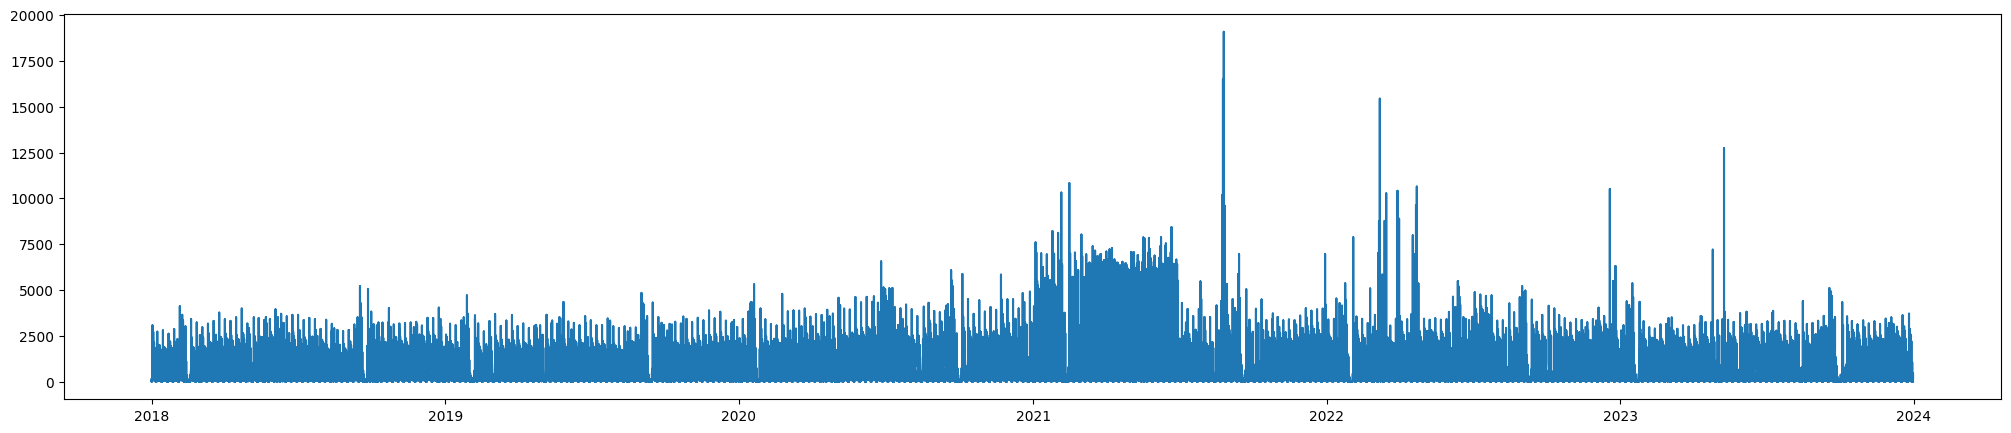

In [51]:
# 대분류 sum 친 거. 

plt.figure(figsize=(25,5))

plt.plot(df['배송년월일'], df['대분류Sum'], linestyle='-', label='Value')
plt.show()

In [3]:
# (전국 - 서울) + (서울 - 서울) 데이터  
import os
import pandas as pd

# 최종 결과를 저장할 리스트
all_dataframes = []

for year in range(2018, 2024):
    # 파일 이름 리스트 생성 (예: 2023년의 12개 파일)
    file_names = [f"seoul_data/seoulToseoul/{year}/DWC_KXLCLS_OD_DAY_SEOULGU_SEOULGU_{year}{str(month).zfill(2)}.csv" for month in range(1, 13)]
    file_names2 = [f"seoul_data/allToseoul/{year}/DWC_KXLCLS_OD_DAY_SIDO_SEOULGU_{year}{str(month).zfill(2)}.csv" for month in range(1, 13)]

    # 연도별 데이터프레임 리스트 생성
    dataframes = []

    for file_name in file_names:
        if os.path.exists(file_name):  # 파일이 존재하는지 확인
            try:
                # 인코딩 지정
                df = pd.read_csv(file_name, encoding='euc-kr')  # euc-kr로 시도
                dataframes.append(df)
            except UnicodeDecodeError:
                print(f"Encoding error in file: {file_name}")
        else:
            print(f"File not found: {file_name}")

    for file_name in file_names2:
        if os.path.exists(file_name):  # 파일이 존재하는지 확인
            try:
                # 인코딩 지정
                df = pd.read_csv(file_name, encoding='euc-kr')  # euc-kr로 시도
                dataframes.append(df)
            except UnicodeDecodeError:
                print(f"Encoding error in file: {file_name}")
        else:
            print(f"File not found: {file_name}")

    # 연도별 데이터프레임 병합 및 전체 리스트에 추가
    if dataframes:
        yearly_combined = pd.concat(dataframes, ignore_index=True)
        all_dataframes.append(yearly_combined)

# 모든 연도의 데이터프레임 병합
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
else:
    combined_df = pd.DataFrame()  # 데이터가 없는 경우 빈 데이터프레임 생성

# 결과 출력 (옵션)
print(combined_df.head())


      배송년월일 송하인_시명  송하인_시코드 송하인_구명  송하인_구코드 수하인_시명  수하인_시코드 수하인_구명  수하인_구코드  \
0  20180101  서울특별시       11    용산구  11170.0  서울특별시       11   서대문구    11410   
1  20180101  서울특별시       11    관악구  11620.0  서울특별시       11    구로구    11530   
2  20180101  서울특별시       11    관악구  11620.0  서울특별시       11    성동구    11200   
3  20180101  서울특별시       11    강남구  11680.0  서울특별시       11    종로구    11110   
4  20180101  서울특별시       11    강남구  11680.0  서울특별시       11     중구    11140   

   대분류_착지물동량 가구/인테리어  대분류_착지물동량 기타  대분류_착지물동량 도서/음반  대분류_착지물동량 디지털/가전  \
0                  0             0                0                 0   
1                  0             0                0                 0   
2                  0             0                0                 0   
3                  0             0               10                 0   
4                  0             0                5                 0   

   대분류_착지물동량 생활/건강  대분류_착지물동량 스포츠/레저  대분류_착지물동량 식품  대분류_착지물동량 출산/육아  \
0              

In [4]:
# 데이터프레임으로 변환變換
df = pd.DataFrame(combined_df)
df

,배송년월일,송하인_시명,송하인_시코드,송하인_구명,송하인_구코드,수하인_시명,수하인_시코드,수하인_구명,수하인_구코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20180101,서울특별시,11,용산구,11170.0,서울특별시,11,서대문구,11410,0,0,0,0,0,8,0,0,0,0,0
1,20180101,서울특별시,11,관악구,11620.0,서울특별시,11,구로구,11530,0,0,0,0,0,0,0,0,0,0,0
2,20180101,서울특별시,11,관악구,11620.0,서울특별시,11,성동구,11200,0,0,0,0,0,0,0,0,0,0,0
3,20180101,서울특별시,11,강남구,11680.0,서울특별시,11,종로구,11110,0,0,10,0,0,0,0,0,0,16,0
4,20180101,서울특별시,11,강남구,11680.0,서울특별시,11,중구,11140,0,0,5,0,0,0,0,0,0,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166964,20231231,제주특별자치도,50,NaN,NaN,서울특별시,11,동작구,11590,0,0,0,0,0,0,16,0,0,0,0
2166965,20231231,제주특별자치도,50,NaN,NaN,서울특별시,11,은평구,11380,0,0,0,0,0,0,9,0,0,0,0
2166966,20231231,제주특별자치도,50,NaN,NaN,서울특별시,11,노원구,11350,0,0,0,0,0,0,21,0,0,0,0
2166967,20231231,강원특별자치도,51,NaN,NaN,서울특별시,11,성동구,11200,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# 일별.. 평균
import matplotlib.pyplot as plt


# 지역구별로..  분류한 다음에 대분류가 들어간 컬럼에 대해서 전부 sum 치고.. 

# "대분류"라는 이름이 들어간 value 전부 sum 치고... 컬럼 하나에 새로 만들기. 
def process_row(row):
    sum = 0
    for col in row.index:  # 열 이름을 `row.index`로 순회
        if "대분류" in col:  # 열 이름에 "대분류" 포함 여부 확인
            sum += row[col]
    return sum

df['대분류Sum'] = df.apply(process_row, axis=1)


In [6]:
# int -> str 변환 후 날짜형으로 변환
df["배송년월일"] = pd.to_datetime(df["배송년월일"].astype(str), format="%Y%m%d")

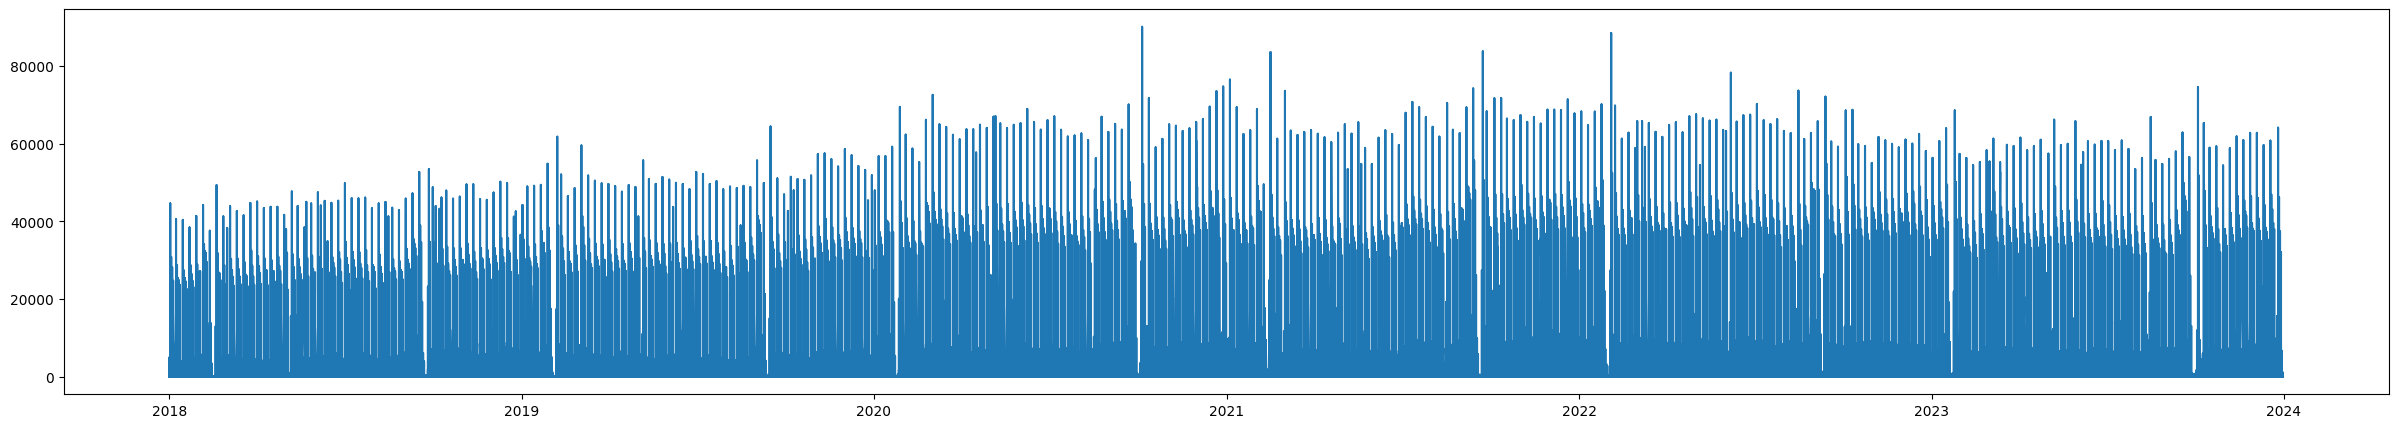

In [57]:
# 대분류 sum 친 거. 

plt.figure(figsize=(30,5))

plt.plot(df['배송년월일'], df['대분류Sum'], linestyle='-', label='Value')
plt.show()

In [67]:
# column List 
df.columns

Index(['배송년월일', '송하인_시명', '송하인_시코드', '송하인_구명', '송하인_구코드', '수하인_시명', '수하인_시코드',
       '수하인_구명', '수하인_구코드', '대분류_착지물동량 가구/인테리어', '대분류_착지물동량 기타',
       '대분류_착지물동량 도서/음반', '대분류_착지물동량 디지털/가전', '대분류_착지물동량 생활/건강',
       '대분류_착지물동량 스포츠/레저', '대분류_착지물동량 식품', '대분류_착지물동량 출산/육아', '대분류_착지물동량 패션의류',
       '대분류_착지물동량 패션잡화', '대분류_착지물동량 화장품/미용', '대분류Sum'],
      dtype='object')

In [72]:
# sum 이 잡혔으니까 . 
# 지역구별로 sum을 쳐보면 좋을 듯. 
df.groupby('수하인_구명')[['대분류Sum']].sum().sort_values('대분류Sum', ascending=False)


# 18.01 ~ 23.12 
# 총 물류량 순위 
# 강남구 > 송파구 > 강서구 

,대분류Sum
수하인_구명,
강남구,183762332
송파구,160199312
강서구,137207847
서초구,121684634
관악구,111218960
마포구,106401876
영등포구,101155940
성북구,101107144
노원구,100418220


In [7]:
# year, month, day 컬럼으로 분류 . 
df['year'] = df['배송년월일'].dt.year
df['month'] = df['배송년월일'].dt.month
df['day'] = df['배송년월일'].dt.day

In [20]:
df.groupby(['year'])[['대분류Sum']].sum()
# ㅛㄷd

,대분류Sum
year,
2018,328006688
2019,343774145
2020,430393405
2021,441024111
2022,404584797
2023,372248532


In [23]:
# 월별.. 
df.groupby(['month'])[['대분류Sum']].sum().sort_values('대분류Sum', ascending = False)


,대분류Sum
month,
12,208489374
11,206849511
3,202176364
7,198707301
6,196111480
5,195373821
10,193370686
4,189675326
1,188393753


In [10]:
df.groupby(['day'])[['대분류Sum']].sum().sort_values(['대분류Sum'], ascending=False)

,대분류Sum
day,
7,84224597
2,83735295
4,82440519
16,80858813
8,80149874
18,79754196
13,79592334
17,79056254
14,77860612


In [10]:
df.groupby(['수하인_구명'])[['대분류Sum']].sum()


,대분류Sum
수하인_구명,
강남구,183762332
강동구,92419547
강북구,56232170
강서구,137207847
관악구,111218960
광진구,81390166
구로구,89657163
금천구,64535677
노원구,100418220


In [ ]:
# '대분류_착지물동량 가구/인테리어', '대분류_착지물동량 기타',
#        '대분류_착지물동량 도서/음반', '대분류_착지물동량 디지털/가전', '대분류_착지물동량 생활/건강',
#        '대분류_착지물동량 스포츠/레저', '대분류_착지물동량 식품', '대분류_착지물동량 출산/육아', '대분류_착지물동량 패션의류',
#        '대분류_착지물동량 패션잡화', '대분류_착지물동량 화장품/미용'

In [ ]:
# 입지선정.... 시계열이면... 다른 부분들도.
# 최적의 입지..
# 물동량
# 


## 데이터 가공. -------------------- 여기서 시작 --------------------## 


In [4]:
# (전국 - 서울) + (서울 - 서울) 데이터  
import os
import pandas as pd

# 최종 결과를 저장할 리스트
all_dataframes = []

for year in range(2018, 2024):
    # 파일 이름 리스트 생성 (예: 2023년의 12개 파일)
    file_names = [f"seoul_data/seoulToseoul/{year}/DWC_KXLCLS_OD_DAY_SEOULGU_SEOULGU_{year}{str(month).zfill(2)}.csv" for month in range(1, 13)]
    file_names2 = [f"seoul_data/allToseoul/{year}/DWC_KXLCLS_OD_DAY_SIDO_SEOULGU_{year}{str(month).zfill(2)}.csv" for month in range(1, 13)]

    # 연도별 데이터프레임 리스트 생성
    dataframes = []

    for file_name in file_names:
        if os.path.exists(file_name):  # 파일이 존재하는지 확인
            try:
                # 인코딩 지정
                df = pd.read_csv(file_name, encoding='euc-kr')  # euc-kr로 시도
                dataframes.append(df)
            except UnicodeDecodeError:
                print(f"Encoding error in file: {file_name}")
        else:
            print(f"File not found: {file_name}")

    for file_name in file_names2:
        if os.path.exists(file_name):  # 파일이 존재하는지 확인
            try:
                # 인코딩 지정
                df = pd.read_csv(file_name, encoding='euc-kr')  # euc-kr로 시도
                dataframes.append(df)
            except UnicodeDecodeError:
                print(f"Encoding error in file: {file_name}")
        else:
            print(f"File not found: {file_name}")

    # 연도별 데이터프레임 병합 및 전체 리스트에 추가
    if dataframes:
        yearly_combined = pd.concat(dataframes, ignore_index=True)
        all_dataframes.append(yearly_combined)

# 모든 연도의 데이터프레임 병합
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
else:
    combined_df = pd.DataFrame()  # 데이터가 없는 경우 빈 데이터프레임 생성

# 결과 출력 (옵션)
# print(combined_df.head())

# 데이터프레임으로 변환變換
df = pd.DataFrame(combined_df)

# 일별.. 평균
import matplotlib.pyplot as plt


# 지역구별로..  분류한 다음에 대분류가 들어간 컬럼에 대해서 전부 sum 치고.. 

# "대분류"라는 이름이 들어간 value 전부 sum 치고... 컬럼 하나에 새로 만들기. 
def process_row(row):
    sum = 0
    for col in row.index:  # 열 이름을 `row.index`로 순회
        if "대분류" in col:  # 열 이름에 "대분류" 포함 여부 확인
            sum += row[col]
    return sum

df['대분류Sum'] = df.apply(process_row, axis=1)

# int -> str 변환 후 날짜형으로 변환
df["배송년월일"] = pd.to_datetime(df["배송년월일"].astype(str), format="%Y%m%d")

# 기본 데이터 만들기 ON

In [5]:
# 송하인이 서울이냐 서울 아니냐로 분류. 
df['startIsSeoul'] = np.where(pd.isna(df['송하인_구명']), 0, 1)

# 송하인 관련 컬럼 Drop 
df_temp1 = df.drop(columns=['송하인_시명','송하인_시코드','송하인_구코드','송하인_구명'])

# 수하인 시코드, 시명, 구코드 제거 
df_temp1 = df_temp1.drop(columns=['수하인_시명','수하인_시코드','수하인_구코드'])


In [6]:
# 초기 모델은 최대한 가볍게 갈거니 지역별 상품 분류까지는 떨구자. 
dropList = []
for columnName in df_temp1.columns:
    if '대분류' in columnName:
        if columnName != '대분류Sum':
            dropList.append(columnName)


print(dropList)

# 상품 분류 떨구기 
df_temp2 = df_temp1.drop(columns=dropList)

['대분류_착지물동량 가구/인테리어', '대분류_착지물동량 기타', '대분류_착지물동량 도서/음반', '대분류_착지물동량 디지털/가전', '대분류_착지물동량 생활/건강', '대분류_착지물동량 스포츠/레저', '대분류_착지물동량 식품', '대분류_착지물동량 출산/육아', '대분류_착지물동량 패션의류', '대분류_착지물동량 패션잡화', '대분류_착지물동량 화장품/미용']


In [9]:
df_temp2

,배송년월일,수하인_구명,대분류Sum,startIsSeoul
0,2018-01-01,서대문구,8,1
1,2018-01-01,구로구,0,1
2,2018-01-01,성동구,0,1
3,2018-01-01,종로구,26,1
4,2018-01-01,중구,90,1
...,...,...,...,...
2166964,2023-12-31,동작구,16,0
2166965,2023-12-31,은평구,9,0
2166966,2023-12-31,노원구,21,0
2166967,2023-12-31,성동구,0,0


## 지역별 노인 비율 ## 

In [18]:
# 지역별 노인 비율 . 
# 거주노인인구 / 거주인구 수
# 거주인구 수 땡겨오기 
oldman_data = pd.read_csv('seoul_data/인구밀도.csv')
oldman_df = pd.DataFrame(oldman_data)

In [19]:
oldman_df = oldman_df.rename({'동별(2)':'수하인_구명'})
oldman_df.groupby(['동별(2)'])[['인구 (명)','면적 (㎢)','인구밀도 (명/㎢)']].ㄴ

,동별(1),동별(2),동별(3),인구 (명),면적 (㎢),인구밀도 (명/㎢)
0,합계,소계,소계,9638799,605.20,15927
1,합계,종로구,소계,150453,23.91,6292
2,합계,종로구,사직동,9273,1.23,7539
3,합계,종로구,삼청동,2457,1.49,1649
4,합계,종로구,부암동,9389,2.27,4136
...,...,...,...,...,...,...
447,합계,강동구,천호2동,33425,1.57,21290
448,합계,강동구,길동,45042,1.61,27976
449,합계,강동구,강일동,34283,2.26,15169
450,합계,강동구,상일1동,39440,1.82,21670


## 건축물 연면적 ##
사무실 연면적에 따른 물동량 증가 -> 상업지구 파악..


In [7]:
# 건축물연면적 갖고 오기 . 
structure_data = pd.read_csv('seoul_data/건축물연면적.csv')
structure_df = pd.DataFrame(structure_data)

In [ ]:
# join을 위해서 drop 치기
structure_df = structure_df.drop(columns=['자치구별(1)'])


In [13]:
# 수하인 구명으로 이름 변경變更
structure_df = structure_df.rename(columns={'자치구별(2)':'수하인_구명'})

In [15]:
pd.merge(df_temp2, structure_df, on='수하인_구명', how='inner')

,배송년월일,수하인_구명,대분류Sum,startIsSeoul,건축물총면적 (㎡),사무실면적 (㎡),사무실면적구성비 (%)
0,2018-01-01,서대문구,8,1,17758032,554926,3.1
1,2018-01-01,구로구,0,1,23748941,633797,2.7
2,2018-01-01,성동구,0,1,21311438,890964,4.2
3,2018-01-01,종로구,26,1,18342888,2472689,13.5
4,2018-01-01,중구,90,1,20641291,3785703,18.3
...,...,...,...,...,...,...,...
2166964,2023-12-31,동작구,16,0,18972500,490522,2.6
2166965,2023-12-31,은평구,9,0,20951529,439464,2.1
2166966,2023-12-31,노원구,21,0,23709905,280414,1.2
2166967,2023-12-31,성동구,0,0,21311438,890964,4.2


NameError: name 'structure_df' is not defined